In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [ ]:
img1 = cv2.imread('img4_1.bmp')
gray = cv2.cvtColor(img1,cv2.COLOR_BGR2GRAY)
gray = np.float32(gray)
dst1 = cv2.cornerHarris(gray,2,3,0.04)

# result is dilated for marking the corners, not important
dst1 = cv2.dilate(dst1,None)

# Threshold for an optimal value, it may vary depending on the image.
img1[dst1>0.01*dst1.max()]=[0,0,255]

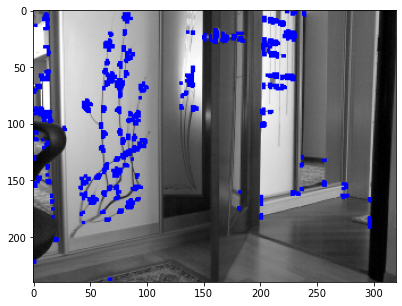

In [ ]:
plt.imshow(img1)
fig = plt.gcf()
fig.set_size_inches(10, 5)
plt.show()

In [ ]:
img2 = cv2.imread('img4_2.bmp')
gray = cv2.cvtColor(img2,cv2.COLOR_BGR2GRAY)
gray = np.float32(gray)
dst2 = cv2.cornerHarris(gray,2,3,0.04)

# result is dilated for marking the corners, not important
dst2 = cv2.dilate(dst2,None)

# Threshold for an optimal value, it may vary depending on the image.
img2[dst2>0.01*dst2.max()]=[0,0,255]

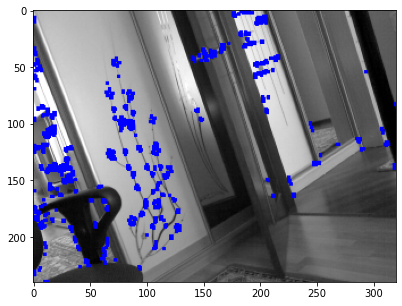

In [ ]:
plt.imshow(img2)
fig = plt.gcf()
fig.set_size_inches(10, 5)
plt.show()

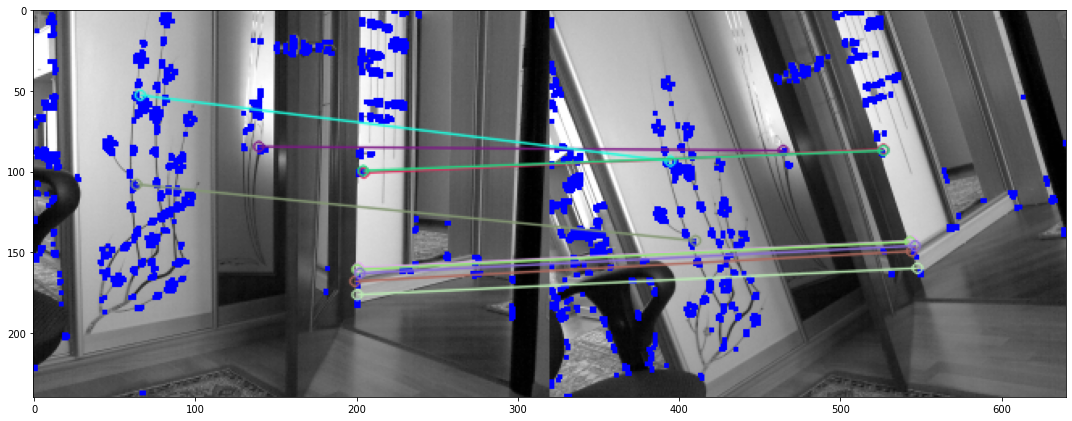

In [ ]:
# Initiate ORB detector
orb = cv2.ORB_create()

# find the keypoints and descriptors with ORB
kp1, des1 = orb.detectAndCompute(img1,None)
kp2, des2 = orb.detectAndCompute(img2,None)

# create BFMatcher object
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)

# Match descriptors.
matches = bf.match(des1,des2)

# Sort them in the order of their distance.
matches = sorted(matches, key = lambda x:x.distance)

# Draw first 10 matches.
img3 = cv2.drawMatches(img1,kp1,img2,kp2,matches[:10],None,flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
plt.imshow(img3)
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
plt.show()

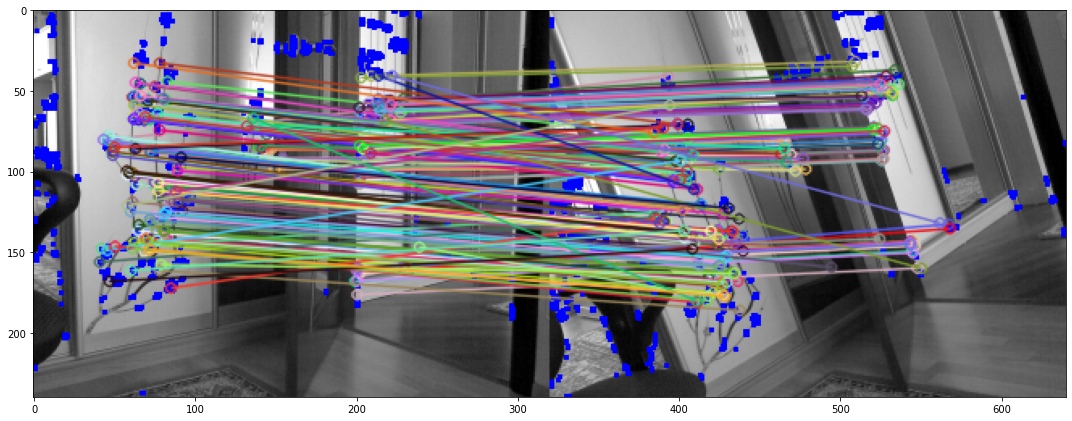

In [ ]:
# Try to draw all matches.
img3 = cv2.drawMatches(img1,kp1,img2,kp2,matches,None,flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
plt.imshow(img3)
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
plt.show()

In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

imgL = cv2.imread('left.png',0)
imgR = cv2.imread('right.png',0)

stereo = cv2.StereoBM(1, 16, 15)
disparity = stereo.compute(imgL, imgR)

# plt.imshow(disparity,'gray')
# plt.show()